# Modelling for Customer Churn


In [721]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [722]:
# We can also give the direct path to data on kaggle
# link : https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

df = pd.read_excel("../data/Telco_customer_churn.xlsx")

### Feature Engineering


In [723]:
df.info()
# we can see that Total charges is object type, we need to convert it to float64 later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [724]:
### Dropping irrelevant columns

irrelevant_columns = [
    "Latitude",
    "Longitude",
    "CustomerID",
    "Count",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Lat Long",
    "Churn Reason",
    "Churn Label",
    "CLTV",
    "Churn Score",
]

df = df.drop(irrelevant_columns, axis=1, errors="ignore")

In [725]:
print("Unique Count and it's dtype")
for column in list(df.columns):
    print("------", column, ": ", len(df[column].unique()), df[column].dtype)

Unique Count and it's dtype
------ Gender :  2 object
------ Senior Citizen :  2 object
------ Partner :  2 object
------ Dependents :  2 object
------ Tenure Months :  73 int64
------ Phone Service :  2 object
------ Multiple Lines :  3 object
------ Internet Service :  3 object
------ Online Security :  3 object
------ Online Backup :  3 object
------ Device Protection :  3 object
------ Tech Support :  3 object
------ Streaming TV :  3 object
------ Streaming Movies :  3 object
------ Contract :  3 object
------ Paperless Billing :  2 object
------ Payment Method :  4 object
------ Monthly Charges :  1585 float64
------ Total Charges :  6531 object
------ Churn Value :  2 int64


We will need to handle different kind of features in a suitable way. For example we have some categorical features and some numerical features. We will use one hot encoding for categorical features.

**Categorical Features** : 'Gender','Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing',
'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method'

**Numerical Features**: 'Tenure' ,'Monthly Charges', 'Total Charges'


In [726]:
# lets see what are the different unique values

print("Unique Values")
for column in list(df.columns):
    print("------", column, ": ", df[column].unique())

Unique Values
------ Gender :  ['Male' 'Female']
------ Senior Citizen :  ['No' 'Yes']
------ Partner :  ['No' 'Yes']
------ Dependents :  ['No' 'Yes']
------ Tenure Months :  [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
------ Phone Service :  ['Yes' 'No']
------ Multiple Lines :  ['No' 'Yes' 'No phone service']
------ Internet Service :  ['DSL' 'Fiber optic' 'No']
------ Online Security :  ['Yes' 'No' 'No internet service']
------ Online Backup :  ['Yes' 'No' 'No internet service']
------ Device Protection :  ['No' 'Yes' 'No internet service']
------ Tech Support :  ['No' 'Yes' 'No internet service']
------ Streaming TV :  ['No' 'Yes' 'No internet service']
------ Streaming Movies :  ['No' 'Yes' 'No internet service']
------ Contract :  ['Month-to-month' 'Two year' 'One year']
------ Paperless Billing :  ['Y

We can observe that for 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies' there is one extra value of 'No internet service'. We can modify that to 'No'. Same can be done for multiple lines.


In [727]:
no_internet_columns = [
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
]  # all service columns

for feature in no_internet_columns:
    df[feature] = df[feature].map(
        {"No": "No", "Yes": "Yes", "No internet service": "No"}
    )

df["Multiple Lines"] = df["Multiple Lines"].map(
    {"No": "No", "Yes": "Yes", "No phone service": "No"}
)
df["Gender"] = df["Gender"].map({"Male": "Yes", "Female": "No"})

Now left is 'Contract','Internet Service' and 'Payment Method' with more than 2 values. We will use one hot encoding for that.


In [728]:
df_enc = pd.get_dummies(df, columns=["Contract", "Internet Service", "Payment Method"])
df_enc

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,Yes,No,No,No,2,Yes,No,Yes,Yes,No,...,True,False,False,True,False,False,False,False,False,True
1,No,No,No,Yes,2,Yes,No,No,No,No,...,True,False,False,False,True,False,False,False,True,False
2,No,No,No,Yes,8,Yes,Yes,No,No,Yes,...,True,False,False,False,True,False,False,False,True,False
3,No,No,Yes,Yes,28,Yes,Yes,No,No,Yes,...,True,False,False,False,True,False,False,False,True,False
4,Yes,No,No,Yes,49,Yes,Yes,No,Yes,Yes,...,True,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,No,72,Yes,No,No,No,No,...,False,False,True,False,False,True,True,False,False,False
7039,Yes,No,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,False,True,False,True,False,False,False,False,False,True
7040,No,No,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,False,True,False,False,True,False,False,True,False,False
7041,No,No,Yes,Yes,11,No,No,Yes,No,No,...,True,False,False,True,False,False,False,False,True,False


In [729]:
flag = 0

In [730]:
if flag == 0:
    for col in list(df_enc.columns):
        if col in ["Tenure Months", "Monthly Charges", "Total Charges", "Churn Value"]:
            continue
        if df_enc[col].dtype == "bool":
            df_enc[col] = df_enc[col].map({True: 1, False: 0})
        else:
            df_enc[col] = df_enc[col].map({"Yes": 1, "No": 0})
    flag = 1

In [731]:
df_enc.info()
# total charges is an object, need to change it to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    7043 non-null   int64  
 1   Senior Citizen                            7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   Tenure Months                             7043 non-null   int64  
 5   Phone Service                             7043 non-null   int64  
 6   Multiple Lines                            7043 non-null   int64  
 7   Online Security                           7043 non-null   int64  
 8   Online Backup                             7043 non-null   int64  
 9   Device Protection                         7043 non-null   int64  
 10  Tech Support                        

In [732]:
df_enc.describe()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.231010,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.550192,0.209144,0.240664,0.343746,0.439585,0.216669,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.421508,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.497510,0.406726,0.427517,0.474991,0.496372,0.412004,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [733]:
# df_enc['Total Charges'] = df_enc['Total Charges'].astype(float) ### not working
## There can be some null values
df_enc["Total Charges"] = pd.to_numeric(df_enc["Total Charges"], errors="coerce")

In [734]:
null_mask = df_enc.isnull().any(axis=1)
null_rows = df_enc[null_mask].index
print("Total number of null rows :", len(null_rows))
print("Total number of rows :", len(df_enc))

Total number of null rows : 11
Total number of rows : 7043


In [735]:
# As 11 is a very few compared to total rows, we can drop it. Otherwise we would have tried to change the datatype manually
df_enc.drop(index=null_rows, inplace=True, errors="raise")
df_enc = df_enc.reset_index(drop=True)

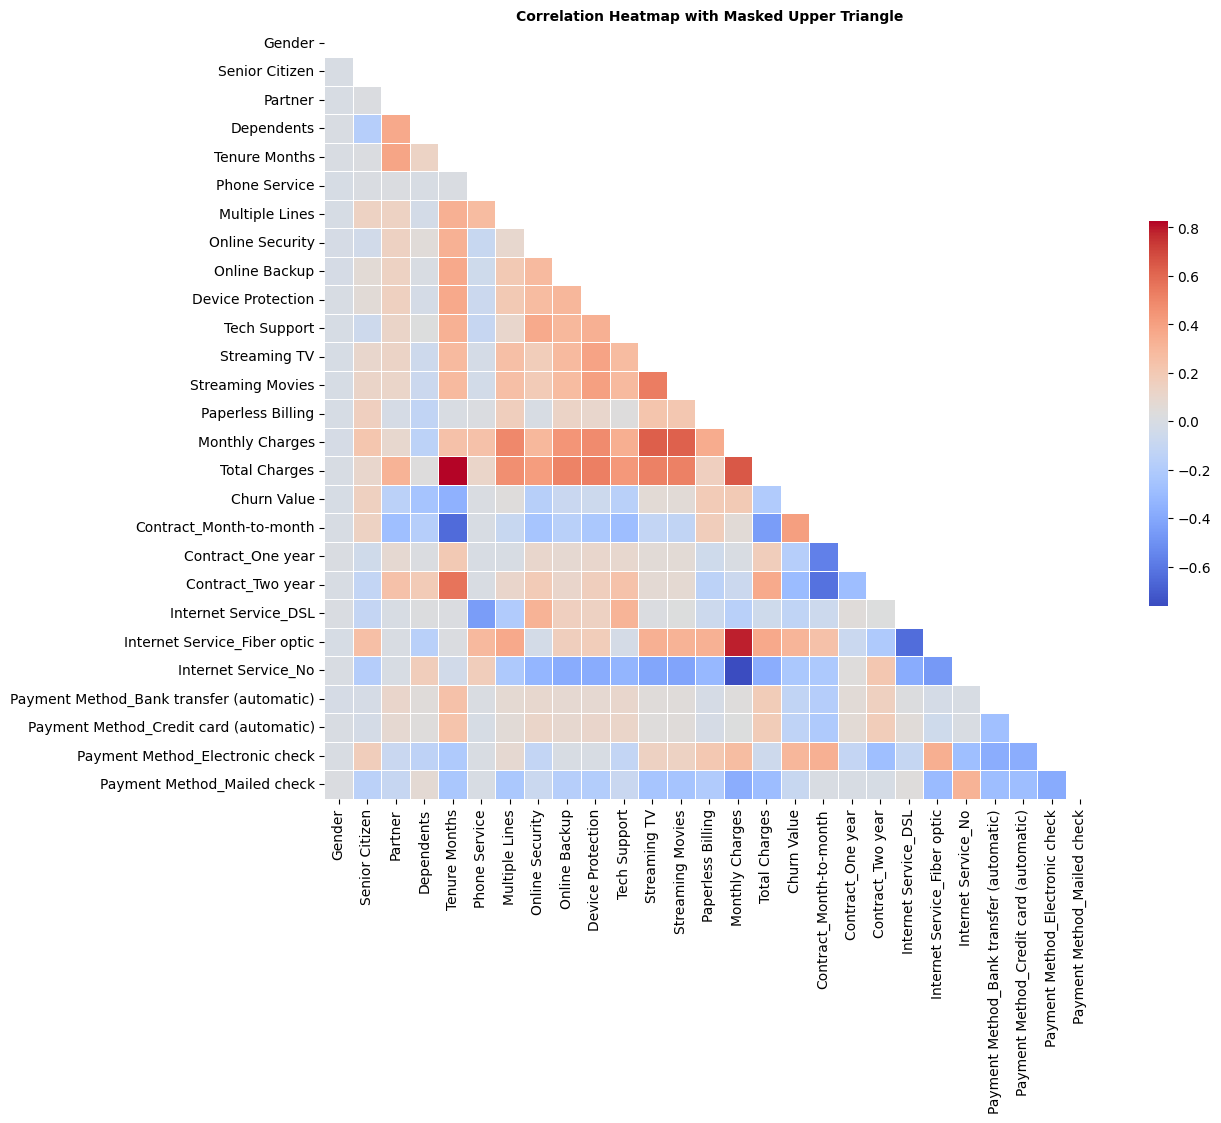

In [736]:
corr = df_enc.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title(
    "Correlation Heatmap with Masked Upper Triangle", fontsize=10, fontweight="bold"
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In this correlation Triangle, we can analyse the features and their correlations efficiently.
Churn Value is highly correlated with Month to Month contract, Internet Service having fiber optic, electronic check payment method, monthly charges and negatively correlated with Tenure months, Two year contract and not having dependents.


### Preparing the data for model Training


In [737]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [738]:
# ### Separating the labels and features
df_label = df_enc["Churn Value"]
df_enc = df_enc.drop(["Churn Value"], axis=1)

In [739]:
### Numeric Feature Scaling

numeric_features = ["Tenure Months", "Monthly Charges", "Total Charges"]
df_numeric = df_enc[numeric_features]
df_enc = df_enc.drop(numeric_features, axis=1)
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)
df_enc = pd.concat([df_enc, df_numeric], axis=1)

Now lets move on to preparing the dataset for training. We can also use data augmentation if results are not satisfactory since there is class imbalance which can lead to bias.


In [740]:
TEST_SIZE = 0.3
SEED = 42

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_enc, df_label, test_size=TEST_SIZE, random_state=SEED
)

# Display the shape of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4922, 26)
Shape of X_test: (2110, 26)
Shape of y_train: (4922,)
Shape of y_test: (2110,)


In [741]:
### Data Augmentation
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

Since this is a Binary Classification Task we can use Logistic Regression, Kernel Support Vector Machine, Decision Tree Models and kNN's.
We will check the performance of each on a simple basis and then move on to kFold cross validation and Feature Cutting.


### Model Selection


In [742]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Initialize models
log_reg = LogisticRegression(penalty="l1", solver="saga")
rf_clf = RandomForestClassifier(criterion="entropy", warm_start=True)
svm_clf = SVC(degree=5)
knn_clf = KNeighborsClassifier(n_neighbors=15)
xgb_clf = XGBClassifier(
    learning_rate=0.01, max_depth=2, n_estimators=3000, scale_pos_weight=1.5
)

# Dictionary of models for iteration
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Support Vector Classifier": svm_clf,
    "K-Nearest Neighbors": knn_clf,
    "XGBoost": xgb_clf,
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Classifier trained successfully.
K-Nearest Neighbors trained successfully.
XGBoost trained successfully.


I have used the best hyperparameters manually for each Model. I will select one model that will hook us to model architecture and then we can work upon that to gain the required metrics.


In [743]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Model Evaluation:
Accuracy: 0.8194
Precision: 0.7099
Recall: 0.5952
F1 Score: 0.6475
Confusion Matrix:
[[1379  143]
 [ 238  350]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1522
           1       0.71      0.60      0.65       588

    accuracy                           0.82      2110
   macro avg       0.78      0.75      0.76      2110
weighted avg       0.81      0.82      0.81      2110


Random Forest Model Evaluation:
Accuracy: 0.7934
Precision: 0.6681
Recall: 0.5136
F1 Score: 0.5808
Confusion Matrix:
[[1372  150]
 [ 286  302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1522
           1       0.67      0.51      0.58       588

    accuracy                           0.79      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110


Sup

Based on the results above, Logistic regression gives the best Accuracy (~ 82%) but I will choose XGBoost Classifier as it gives me the best F1 score. More particularly, it has the highest recall for class 1 (~70%). This is the use case in which I want to minimize False Negatives even if there is high false positive. Meaning, even if I identity non churning customers as churning, the reverse should not happen. I can manipulate these very well using XGBoost Classifier as it is fast and simple.


### Feature Selection


As I am choosing XGBoost Classifier which is Boosted Tree (Ensemble), it is very easy to determine the best features


In [744]:
model = xgb_clf
importance_order = np.argsort(model.feature_importances_)[::-1]

print("Top 10 most important features :")

for index in importance_order[:10]:
    print("-------", df_enc.columns[index])

Top 10 most important features :
------- Contract_Month-to-month
------- Internet Service_Fiber optic
------- Payment Method_Electronic check
------- Contract_Two year
------- Internet Service_No
------- Dependents
------- Tenure Months
------- Streaming Movies
------- Streaming TV
------- Paperless Billing


Lets select top 6 features and then see the classification report.


In [745]:
final_data = df_enc[
    [
        "Contract_Month-to-month",
        "Internet Service_Fiber optic",
        "Payment Method_Electronic check",
        "Internet Service_No",
        "Contract_Two year",
        "Tenure Months",
    ]
]

In [746]:
X_train, X_test, y_train, y_test = train_test_split(
    final_data, df_label, test_size=TEST_SIZE, random_state=SEED
)

In [747]:
xgb_params = {
    "learning_rate": 0.01,
    "max_depth": 3,
    "n_estimators": 2000,
    "scale_pos_weight": 3,
    "enable_categorical": True,
}
model = XGBClassifier(**xgb_params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [782]:
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}%")
print(classification_report(y_test, y_pred))

Accuracy: 80.0000%
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1522
           1       0.74      0.44      0.55       588

    accuracy                           0.80      2110
   macro avg       0.78      0.69      0.71      2110
weighted avg       0.79      0.80      0.78      2110



### K-Fold Cross Validation


In [783]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [785]:
def xgboost_kfold_cv(
    X,
    y,
    xgb_params,
    n_splits=5,
    random_state: int = 42,
    metric_for_best: str = "f1_avg",  # Options: 'accuracy', 'f1_avg', 'f1_class_0', 'f1_class_1'
):

    # Convert inputs to numpy arrays if they're pandas objects
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    elif isinstance(y, pd.DataFrame):
        y = y.values.ravel()


    # Initialize K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Dictionary to store metrics for each fold
    fold_scores = {
        "precision_class_0": [],
        "recall_class_0": [],
        "f1_class_0": [],
        "precision_class_1": [],
        "recall_class_1": [],
        "f1_class_1": [],
        "accuracy": [],
    }

    # Track best model
    best_score = -np.inf
    best_model = None
    best_fold_info = {}

    # Store all models and their train/val indices
    fold_models = []

    # Perform k-fold cross validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
        try:
            # Split data
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Initialize and train model
            model = XGBClassifier(**xgb_params)
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            # Store model and indices
            fold_models.append(
                {"model": model, "train_idx": train_idx, "val_idx": val_idx}
            )

            # Make predictions
            y_pred = model.predict(X_val)

            # Calculate detailed metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val, y_pred, average=None, labels=[0, 1]
            )

            # Store metrics for each class
            fold_scores["precision_class_0"].append(precision[0])
            fold_scores["recall_class_0"].append(recall[0])
            fold_scores["f1_class_0"].append(f1[0])

            fold_scores["precision_class_1"].append(precision[1])
            fold_scores["recall_class_1"].append(recall[1])
            fold_scores["f1_class_1"].append(f1[1])

            # Calculate and store accuracy
            accuracy = (y_pred == y_val).mean()
            fold_scores["accuracy"].append(accuracy)

            # Calculate metric for best model selection
            current_score = {
                "accuracy": accuracy,
                "f1_avg": (f1[0] + f1[1]) / 2,
                "f1_class_0": f1[0],
                "f1_class_1": f1[1],
            }[metric_for_best]

            # Update best model if current model is better
            if current_score > best_score:
                best_score = current_score
                best_model = model
                best_fold_info = {
                    "fold": fold,
                    "score": current_score,
                    "train_idx": train_idx,
                    "val_idx": val_idx,
                    "metrics": {
                        "accuracy": accuracy,
                        "class_0": {
                            "precision": precision[0],
                            "recall": recall[0],
                            "f1": f1[0],
                        },
                        "class_1": {
                            "precision": precision[1],
                            "recall": recall[1],
                            "f1": f1[1],
                        },
                    },
                }

            print(f"\nFold {fold} Results:")
            print(f"\nAccuracy: {accuracy:.4f}")
            print("\nClassification Report:")
            print(classification_report(y_val, y_pred))

        except Exception as e:
            print(f"Error in fold {fold}: {str(e)}")
            continue

    return fold_scores, best_model, best_fold_info

In [789]:
xgb_params = {
    "learning_rate": 0.01,
    "max_depth": 4,
    "n_estimators": 200,
    "scale_pos_weight": 2.5,
    "min_child_weight": 3,
    "gamma": 0.1,
    "subsample": 0.8,
    "reg_alpha": 0.5,
    "reg_lambda": 0.1,
}

# Run k-fold cross validation
fold_scores, best_model, best_fold_info = xgboost_kfold_cv(
    X_train, y_train, n_splits=5, xgb_params=xgb_params,metric_for_best='f1_class_1'
)


Fold 1 Results:

Accuracy: 0.7503

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       738
           1       0.50      0.74      0.60       247

    accuracy                           0.75       985
   macro avg       0.70      0.75      0.71       985
weighted avg       0.80      0.75      0.76       985


Fold 2 Results:

Accuracy: 0.7635

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       700
           1       0.56      0.80      0.66       285

    accuracy                           0.76       985
   macro avg       0.73      0.77      0.74       985
weighted avg       0.80      0.76      0.77       985


Fold 3 Results:

Accuracy: 0.7530

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       748
           1       0.49      0.79      0.60       236

    a